# TP2 Interpolation Numérique 
<img src="tp2an.png">

## Exercice 1

On considère le programme MATLAB suivant :
``` octave
function u=prog(x,y,c)
S = y; 
n = length(x); 
for j=1:n
    L = c-x; 
    for k=1:n
        if (k == j)
           L(k) = 1;
        else
           L(k) = L(k)/(x(j) - x(k));
        end 
    end 
    S(j) = S(j)*prod(L); 
end 
u=sum(S); 
```

## Version Python

In [1]:
from numpy import prod
def prog(x,y,c):
    S = [] 
    n = len(x)
    
    for j in range(n):
        L =[c-xx for xx in x]
        for k in range(n):
            if (k == j):                
                L[k] = 1
            else:
                L[k] = L[k]/(x[j] - x[k])   
        S.append(y[j]*prod(L))
        
    return  sum(S)

In [2]:

X=[1 ,2 ,3 ,4,-2];
Y=[-1, 0, 2 ,1,3];
for i in X:
    print(prog(X,Y,i))
sum(X)

-1.0
0.0
2.0
1.0
3.0


8

**Polynome d'interpolation de Lagrange** 
> Soient $(x_0,y_0), \ldots,(x_k,y_k),\ldots ,(x_n,k_n)$ $n+1$ points deux à deux distincts, le polynôme d'interpolation de Lagrange associés à ces points supports est défini par :
> $$P_n(x)=\sum_{k=0}^{n-1} y_kL_k(x)$$

avec $L_{0}(x)=\displaystyle\frac{(x-x_1)(x-x_2)\ldots(x-x_{n})}{(x_0-x_1)(x_0-x_2)\ldots(x_0-x_{n})}$ et $L_{k}(x)=\displaystyle\frac{(x-x_1)(x-x_2)\ldots(x-x_{k-1})(x-x_{k+1})\ldots(x_0-x_{n})}{(x_k-x_0)(x_k-x_1)\ldots(x_k-x_{k-1})(x_k-x_{k+1})\ldots(x_k-x_{n})}$ pour $k\in \{1,\ldots,n\}$

1) Que renvoie la fonction PR lorsqu'on lui déclare  **x=(x(1),x(2),...,x(n))x=(x(1),x(2),...,x(n))**  et  **y=(y(1),y(2),...,y(n))y=(y(1),y(2),...,y(n))**  deux vecteurs de même longueur  `n` et `c`  un nombre réel donné.

## Code Python

In [1]:
from numpy import prod
def PR (x,y,c):
    S=[]
    n=len(x)
    for j in range(n):
        l=[c-h for h in x]
        for k in range (n):
            if k==j:
                l[k]=1
            else:
                 l[k]=l[k]/(x[j]-x[k])
        S.append(y[j]*prod(l))
    return sum(S) 

In [3]:
X=[1,2,3,4]
Y=[-1,0,2,1]
c=3
print(PR(X,Y,c))

2.0


In [4]:
X=[1,2,3,4]
Y=[-1,0,2,1]
for i in X :
    print (PR(X,Y,i))
sum(X)

-1.0
0.0
2.0
1.0


10

2) Que contient le vecteur  LL  après la fin de la boucle  kk .

In [8]:
def pr(x,y,c):
    S = [] 
    n = len(x)
    for c in x:
            for j in range(n):
                L =[c-xx for xx in x]
                for k in range(n):
                    if (k == j):                
                        L[k] = 1
                    else:
                        L[k] = L[k]/(x[j] - x[k])   
                S.append(y[j]*prod(L))

            return L[3]

In [12]:
X=[1,2,3,4]
Y=[-1,0,2,1]
for i in X:
    print(pr(X,Y,i))

1
1
1
1


3) Utiliser cette fonction pour dessiner le graph du polynôme de Lagrange  de la fonction $f(x) = \dfrac{1}{1 + x^2}$ aux points $x=[-1:0.1:1]$.

In [43]:
x=[-1:0.1:1];
f=@(x) 1./(1+x.^2)
y=f(x);

t=linspace(-1,1,100);
for u=1 : length(t)
pt(u)=PR(x,y,t(u));
end
plot(t,pt,'r',x,y,'bo',t,f(t),'g')

SyntaxError: invalid syntax (<ipython-input-43-ff6f69cf8c38>, line 1)

4) On considère la fonction $F$ suivante :
$$
F(h) = \pi -\cos \left(\frac{h}{2}\right) + h \sqrt{1-\left(\frac{h}{2}\right)^2}, \qquad
h\in [0,2],
$$
et les points d'interpolation $x_i = ih$, $0\leq i\leq n$, avec $ n=20$ et $h=0.1$.

4.1) Représenter sur un même graphe la fonction $F$ et $p_n$, où
 $p_n$ est le polynôme d'interpolation de Lagrange de $F$ aux
 points $x_0,\,\ldots,\,x_n$.

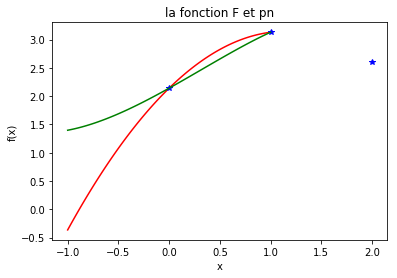

In [18]:
import math
x=np.arange(0,3)
p=[]
f= lambda x:math.pi-math.cos(x/2)+x*math.sqrt(1-(x/2)**2)
f1 = np.vectorize(f)
y=f1(x)
t=np.linspace(-1,1,100)
for i in range(len(t)):
    p.append(PR(x,y,t[i]))
plt.plot(t,p,"r",x,y,"b*",t,f1(t),"g")
plt.title("la fonction F et pn")
plt.xlabel ("x")
plt.ylabel ("f(x)")
plt.show()    

#numpy.vectorize permet de convertir des fonctions «ordinaires»


2)Tracer la courbe d'erreur  (la
 fonction $F-p_n$). Qu'observer vous.

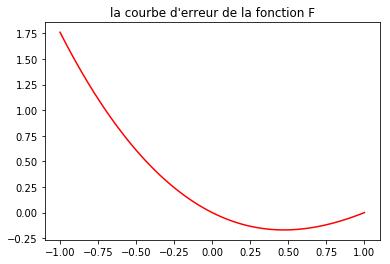

In [19]:
import math
x=np.arange(0,3)
p=[]
f= lambda x:math.pi-math.cos(x/2)+x*math.sqrt(1-(x/2)**2)
f1 = np.vectorize(f)
y=f1(x)
t=np.linspace(-1,1,100)
for i in range(len(t)):
    p.append(PR(x,y,t[i]))
plt.title("la courbe d'erreur de la fonction F")
plt.plot(t,f1(t)-p,'r') 
plt.show()

## Exercice 2  ( Phenomène de Runge )

1) Vérifier que sur $[-5,5]$ le polynôme d'interpolation de Lagrange
  de la fonction $f$ définie par $f(x)=\displaystyle{\frac{1}{1+x^2}}$,
en $N$ points uniformément espacés ne convergent pas correctement aux voisinages de $-1$ et $1$, pour $N=7,8,9,10 ...$

Text(0.5, 1.0, 'In N=10')

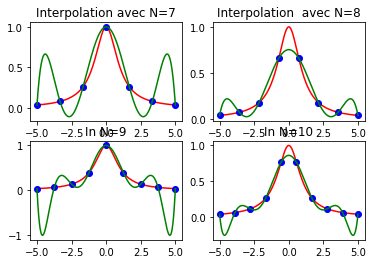

In [21]:
import numpy as np
import matplotlib.pyplot as plt
N=7
X=np.linspace(-5,5,N)
f=  lambda x: 1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,1)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation avec N=7")
##############################
N=8
X=np.linspace(-5,5,N)
f=  lambda x: 1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,2)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation  avec N=8")
##############################
N=9
X=np.linspace(-5,5,N)
f=  lambda x: 1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,3)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("In N=9")
##############################
N=10;
X=np.linspace(-5,5,N)
f=  lambda x: 1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,4)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("In N=10")



2) Les points de Tchebycheff sur un intervalle $[a;b]$ sont définie par :
  $$x_k=\dfrac{a+b}{2}+\dfrac{a-b}{2}\cos\left(\frac{k-1}{n-1}\pi\right)\hspace{0.5cm} (k=1,..,n: x_1=a:x_n=b)$$

  Vérifier que sur $[-5; 5]$ ; l'interpolation polynômiale de $f(x) = \dfrac{1}{1 + x^2}$ ; en $N$ points de Tchebychev
est meilleure qu'une  interpolation utilisant $N$ points uniforment espacés (on prendra $N=10, 11, 16, 17$).

In [27]:
import math
def tcheb(a,b,n):
    v=[]
    for k in range(n):
        v.append((a+b)/2+(a-b)/2*math.cos((k-1)/(n-1)*math.pi))
    return v


In [28]:
tcheb(-5,5,11)

[-4.755282581475767,
 -5.0,
 -4.755282581475767,
 -4.045084971874737,
 -2.938926261462366,
 -1.5450849718747373,
 -3.061616997868383e-16,
 1.5450849718747368,
 2.938926261462365,
 4.045084971874736,
 4.755282581475767]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Tchebycheff N=10')

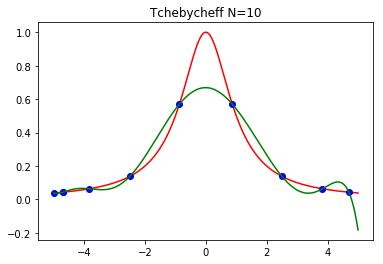

In [29]:
import numpy as np
import matplotlib.pyplot as plt
N=10
t=np.linspace(-5,5,1000)
f= lambda x: 1/(1+x**2)
Xt=tcheb(-5,5,N)
Yt=[]
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t,np.polyval(pt,t),'g')
plt.title("Tchebycheff N=10")



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  


Text(0.5, 1.0, 'Tchebycheff N=11')

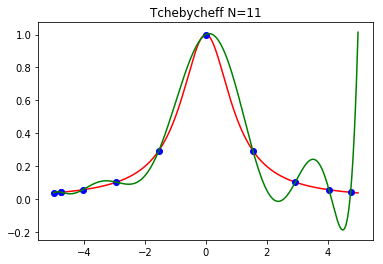

In [30]:
N=11
t=np.linspace(-5,5,1000)
f= lambda x: 1/(1+x**2)
Xt=tcheb(-5,5,N)
Yt=[]
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1);
plt.plot(t,f(t),'r',Xt,Yt,'ob',t,np.polyval(pt,t),'g')
plt.title("Tchebycheff N=11")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Tchebycheff N=16')

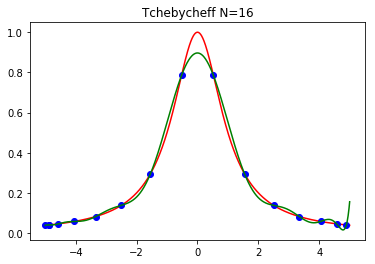

In [31]:
import numpy as np
import matplotlib.pyplot as plt
N=16
t=np.linspace(-5,5,1000)
f= lambda x: 1/(1+x**2)
Xt=tcheb(-5,5,N)
Yt=[]
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1);
plt.plot(t,f(t),'r',Xt,Yt,'ob',t,np.polyval(pt,t),'g')
plt.title("Tchebycheff N=16")


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  


Text(0.5, 1.0, 'Tchebycheff N=17')

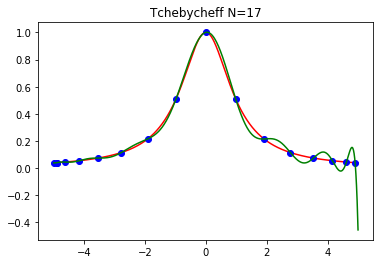

In [32]:
N=17
t=np.linspace(-5,5,1000)
f= lambda x: 1/(1+x**2)
Xt=tcheb(-5,5,N)
Yt=[]
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
plt.plot(t,f(t),'r',Xt,Yt,'ob',t,np.polyval(pt,t),'g')
plt.title("Tchebycheff N=17")


## Exercice 3

On considère les deux programme MATLAB suivant :
``` octave
function f=intN(x,f)% RECURSIVE
m=length(x);
for k=2:m;
    f(k:m)=(f(k:m)-f(k-1:m-1))./(x(k:m)-x(1:m+1-k))
end
``` 
``` octave
function p=intNval(x,c,t)
m=length(x);
p=c(m)*ones(size(t));
for k=m-1:-1:1;
    p=p.*(t-x(k))+c(k);
end
```

1) Déterminer en utilisant les deux codes puis par un calcul à la main le polynôme de Newton pour les données suivantes :


<center>
<table>    
      $\begin{array}{|c|c|c|}
   \hline
   i & x_i  & y_i \\
   \hline
   0 &   -1  &   6 \\
   1 &   0 &  1 \\
   2 &  2  &  3 \\
   3 &  5  &  66 \\
   \hline
\end{array}$  
</table>
</center>

In [33]:
def intN(x,y):
    m=len(x)
    f=np.zeros(m)
    for k in range(1,m):
        f[k:m+1]=np.array(np.array(y[k:m+1])-np.array(y[k-1:m-1]))/np.array(np.array(x[k:m+1])-np.array(x[0:m-k]))
    return f

In [35]:
x=[-1,0,2,5]
y=[6,1,3,66]
intN(x,y)

array([ 0.        , -5.        ,  0.66666667, 10.5       ])

In [36]:
def intNval(x,y,t):
    m=len(x)
    p=y[m-1]*np.ones(len(t))
    for k in range(m-2,-1,-1):
        p=p*np.array((np.array(t)-x[k]))+y[k]
    return p

In [37]:
x=[-1,0,2,5];
y=[6,1,3,66];
t=[0,1,2,3];
intNval(x,y,t)

array([   7., -118.,   27.,  838.])

In [38]:
##Calcul a la main

2) Donner le Graph du polynôme trouvé en 1) dans l'intervalle $[-1;5]$.

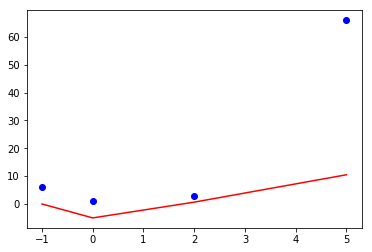

In [39]:
x=[-1,0,2,5]
y=[6,1,3,66]
f=intN(x,y)
plt.plot(x,f,'r',x,y,'ob')
plt.show()

3) Calculer $P(1)$ en utilisant le polynôme trouvé en 1).

In [40]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
p=intNval(x,y,t)
p[0]

7.0

## Conclusion génerale
La méthode de Newton est la méthode la plus simple dans son application s’il y a convergence, celle-ci est rapide (souvent quadratique), elle nécessite un
seul point de départ.
Mais la fonction  f doit être suffisamment régulière, la convergence n’est pas assurée dans tous
les cas, s’il y a plusieurs racines elle ne converge par forcément vers la plus proche du point de départ.
